<a href="https://colab.research.google.com/github/Bindiyaa5/SER517team29/blob/main/DataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath = '/content/drive/My Drive/merged_rides_with_elevation.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(filepath)

In [ ]:
df['Start_Altitude'] = df[['Start_Altitude', 'Start_Altutude', 'State_Altitude']].bfill(axis=1).iloc[:, 0]

df.drop(columns=['State_Altitude', 'Start_Altutude'], inplace=True)

In [ ]:
df['End_Altitude'] = df[['End_Altitude', 'end_altitude', 'end_Altitude']].bfill(axis=1).iloc[:, 0]

df.drop(columns=['end_Altitude', 'end_altitude'], inplace=True)

In [ ]:
df['Start_Altitude'].fillna(method='ffill', inplace=True)
df['End_Altitude'].fillna(df['End_Altitude'].mean(), inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
df['Elevation_Change'] = df['End_Altitude'] - df['Start_Altitude']

imputer = SimpleImputer(strategy='mean')
df['Elevation_Change'] = imputer.fit_transform(df[['Elevation_Change']])

df = df.drop(columns=['Start_Altitude', 'End_Altitude'])

In [ ]:
import numpy as np

# Function to calculate distance between two lat-lng points
def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Difference in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    # Distance in kilometers
    distance = R * c
    return distance

In [ ]:
df['Distance'] = df.apply(lambda x: haversine_distance(x['start_lat'], x['start_lng'], x['end_lat'], x['end_lng']), axis=1)

In [ ]:
df = df.drop(columns=['start_lat', 'start_lng', 'end_lat', 'end_lng'])

In [ ]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

In [ ]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [ ]:
df['season'] = df['started_at'].dt.month.map(get_season)

In [ ]:
def get_day_of_week(timestamp):
    return timestamp.strftime("%A")

# Apply the function to each row in the DataFrame
df['day_of_week'] = df['started_at'].apply(get_day_of_week)

In [ ]:
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [ ]:
weatherData = '/content/drive/My Drive/3667056.csv'

In [ ]:
tempData = pd.read_csv(weatherData)

In [ ]:
tempData['started_at'] = pd.to_datetime(tempData['DATE'])
tempData['started_at'] = tempData['started_at'].dt.date

In [ ]:
df['started_at'] = df['started_at'].dt.date

In [ ]:
df = pd.merge(df, tempData[['started_at', 'TMAX', 'TMIN']], on='started_at', how='left')

In [ ]:
df['rideable_type'] = df['rideable_type'].replace({
    'electric_bike': 'electric',
    'docked_bike': 'classic',
    'classic_bike': 'classic'
})

            ride_id          started_at            ended_at member_casual  \
0  C2F7DD78E82EC875 2022-01-13 11:59:00 2022-01-13 12:02:00        casual   
1  A6CF8980A652D272 2022-01-10 08:41:00 2022-01-10 08:46:00        casual   
2  BD0F91DFF741C66D 2022-01-25 04:53:00 2022-01-25 04:58:00        member   
3  CBB80ED419105406 2022-01-04 00:18:00 2022-01-04 00:33:00        casual   
4  DDC963BFDDA51EEA 2022-01-20 01:31:00 2022-01-20 01:37:00        member   

    trip_duration  Distance  member_casual_encoded  
0 0 days 00:03:00  0.699547                      0  
1 0 days 00:05:00  0.694322                      0  
2 0 days 00:05:00  1.000832                      1  
3 0 days 00:15:00  2.462779                      0  
4 0 days 00:06:00  0.814537                      1  
0    electric
1    electric
2     classic
3     classic
4     classic
Name: rideable_type, dtype: object
                          started_at                       ended_at  \
count                        9212593       

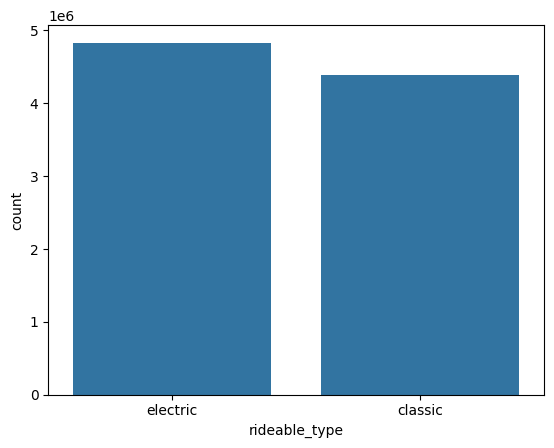

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the data
# Assuming df_X is the DataFrame X and series_y is the Series y
# Make sure the indices are aligned correctly

# EDA
# Check the first few rows of X and y
print(X.head())
print(y.head())

# Summary statistics of X
print(X.describe())

# Distribution of y
sns.countplot(x=y)
plt.show()

# Check the relationship between numerical variables in X and y
sns.pairplot(pd.concat([X, y], axis=1), hue='rideable_type')
plt.show()

# Check the relationship between categorical variables in X and y
# For example, 'member_casual' and 'rideable_type'
sns.countplot(x='member_casual', hue='rideable_type', data=pd.concat([X, y], axis=1))
plt.show()

# Feature Engineering (if needed)
# For example, converting categorical variables to numerical using LabelEncoder
le = LabelEncoder()
X['member_casual_encoded'] = le.fit_transform(X['member_casual'])

# Modeling
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
# Check the data types of all columns in X_train
print(X_train.dtypes)


ride_id                           int64
started_at               datetime64[ns]
ended_at                 datetime64[ns]
member_casual                     int64
Distance                        float64
member_casual_encoded             int64
trip_duration_seconds           float64
dtype: object


R-squared: 0.004326787326382586
           Variable           VIF
0             const  0.000000e+00
1        started_at  2.014713e+06
2          ended_at  2.014719e+06
3     member_casual  1.007721e+00
4  Elevation_Change  1.079784e+00
5          Distance  1.086409e+00


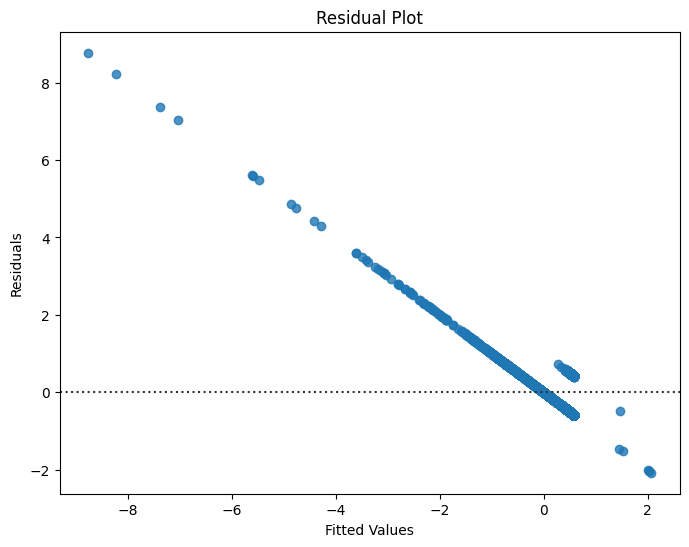

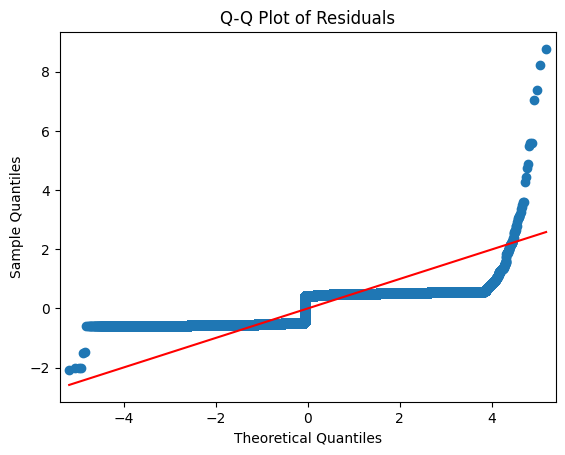

In [ ]:
print("R-squared:", model.rsquared)
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
# Step 5: Check for multicollinearity
# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

# Step 6: Check model assumptions
# Residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=model.fittedvalues, y=model.resid)
plt.title("Residual Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# QQ plot of residuals
sm.qqplot(model.resid, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [ ]:
rf_classifier = RandomForestClassifier(
    n_estimators=50,      # Reduced number of trees
    max_depth=15,         # Limiting tree depth
    max_features='sqrt',  # Limiting the number of features considered for splits
    min_samples_split=10, # Minimum number of samples required to split an internal node
    min_samples_leaf=5,   # Minimum number of samples required to be at a leaf node
    random_state=42,      # For reproducibility
    class_weight='balanced', # Handling imbalanced classes
    n_jobs=-1             # Use all cores available
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.discrete.discrete_model import Poisson
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame containing X and y
# Ensure proper data types

# # Convert datetime columns to numeric representation if needed
# df['started_at'] = (df['started_at'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
# df['ended_at'] = (df['ended_at'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Encode categorical variables if needed
label_encoder = LabelEncoder()
df['member_casual'] = label_encoder.fit_transform(df['member_casual'])

# Define y and X
y = df['rideable_type'].astype('category').cat.codes  # Convert categorical to numeric codes
X = df[['started_at', 'ended_at', 'member_casual', 'Elevation_Change', 'Distance']]

import numpy as np
from statsmodels.discrete.discrete_model import Poisson

# Check for missing or infinite values in X
print("Missing or Infinite Values in X:")
print(np.isnan(X).sum())
print(np.isinf(X).sum())

# Handle missing or infinite values in X
# For example, you can impute missing values with the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Re-fit the Poisson model
poisson_model = Poisson(y, X_imputed).fit()

# Analyze results
print(poisson_model.summary())



Missing or Infinite Values in X:
started_at             0
ended_at               0
member_casual          0
Elevation_Change       0
Distance            7900
dtype: int64
started_at          0
ended_at            0
member_casual       0
Elevation_Change    0
Distance            0
dtype: int64
Optimization terminated successfully.
         Current function value: 0.861441
         Iterations 9
                          Poisson Regression Results                          
Dep. Variable:                      y   No. Observations:              9212593
Model:                        Poisson   Df Residuals:                  9212588
Method:                           MLE   Df Model:                            4
Date:                Mon, 22 Apr 2024   Pseudo R-squ.:                0.001587
Time:                        02:43:12   Log-Likelihood:            -7.9361e+06
converged:                       True   LL-Null:                   -7.9487e+06
Covariance Type:            nonrobust   LLR p-value

In [ ]:
y = np.asarray(y)
X = np.asarray(X)

# Then, re-run the model fitting
# poisson_model = Poisson(y, X).fit()

In [ ]:
from statsmodels.discrete.discrete_model import Poisson
poisson_model = Poisson(y, X_clean).fit()

Optimization terminated successfully.
         Current function value: nan
         Iterations 1


In [ ]:
import numpy as np
from statsmodels.discrete.discrete_model import Poisson
# Handle missing or infinite values in X
X_clean = np.nan_to_num(X, nan=np.nanmean(X), posinf=np.nanmean(X), neginf=np.nanmean(X))

# Then, re-run the model fitting
poisson_model = Poisson(y, X_clean).fit()



Optimization terminated successfully.
         Current function value: nan
         Iterations 1


In [ ]:
poisson_predictions = poisson_model.predict(X)

ValueError: shapes (9212593,6) and (3,) not aligned: 6 (dim 1) != 3 (dim 0)

In [ ]:
poisson_predictions

array([nan, nan, nan, ..., nan, nan, nan])